In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import squarify

## Loading the dataset!

In [2]:
df = pd.read_excel('E:\\Media, Docs & Programs\\Practice\\DataScience\\DigiKala\\Customer buy history\\b683b250.xlsx')

In [3]:
df.head(4)

,order_id,user_id,variant_id,product_id,quantity,price,date,city_id,city_name,state_id,state_name
0,262108413,SlcW7YT835JSzh22o7zRCA==,922274,406523,1,139000,2018-08-20 23:59:02,1698,تهران,9,تهران
1,262108413,SlcW7YT835JSzh22o7zRCA==,685868,435013,1,890000,2018-08-20 23:59:02,1698,تهران,9,تهران
2,262108353,NZidrSuPdqoG7RedrFakeA==,275077,163947,1,9890000,2018-08-20 23:58:39,1698,تهران,9,تهران
3,262108341,dLQImlfXMsgSub4OcfJpGg==,679393,158560,1,349000,2018-08-20 23:58:35,1855,مشهد,12,خراسان رضوی


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   order_id    200000 non-null  int64 
 1   user_id     200000 non-null  object
 2   variant_id  200000 non-null  int64 
 3   product_id  200000 non-null  int64 
 4   quantity    200000 non-null  int64 
 5   price       200000 non-null  int64 
 6   date        200000 non-null  object
 7   city_id     200000 non-null  int64 
 8   city_name   200000 non-null  object
 9   state_id    200000 non-null  int64 
 10  state_name  200000 non-null  object
dtypes: int64(7), object(4)
memory usage: 16.8+ MB


In [47]:
df.isna().sum()

order_id       0
user_id        0
variant_id     0
product_id     0
quantity       0
price          0
date           0
city_id        0
city_name      0
state_id       0
state_name     0
year           0
month          0
day            0
weekday        0
hour           0
weekdayName    0
dtype: int64

## As you can see, there is no null in dataset.

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.describe()

,order_id,variant_id,product_id,quantity,price,city_id,state_id
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000
mean,2.603678e+08,8.194619e+05,386718.575000,1.327395,1.057300e+06,1829.737850,12.122495
std,9.014162e+05,4.162816e+05,212149.173524,1.428635,3.846753e+06,286.319633,7.045052
min,2.588380e+08,2.810000e+02,300.000000,-2.000000,1.000000e+00,1372.000000,2.000000
25%,2.595868e+08,4.835210e+05,191084.000000,1.000000,1.300000e+05,1698.000000,9.000000
50%,2.603573e+08,8.856180e+05,395477.000000,1.000000,2.900000e+05,1698.000000,9.000000
75%,2.610735e+08,1.181338e+06,568665.000000,1.000000,7.490000e+05,1905.000000,14.000000
max,2.621084e+08,1.495812e+06,789337.000000,100.000000,2.120000e+08,2613.000000,32.000000


In [7]:
df.describe(include=object)

,user_id,city_name,state_name
count,200000,200000,200000
unique,56104,816,31
top,JVeVjivUAHEMQmDOXo2EXA==,تهران,تهران
freq,250,107195,111767


In [53]:
df[df['quantity'] <= 0]['quantity'].unique()

array([-1, -2], dtype=int64)

## there are some values in the data that is not quit normal, in the 'quantity' column, the min value is equal to -2, and this is not acceptable as a valid value for quantity. when I checked quantities that are less than or equal to zero, the -1 and -2 apeared in the result. these values may have some meaning that we don't know of, like failed payment or checkout, it also could be a sign for lack of inventory, even so, since I am not sure about it, I will drop these rows.

In [55]:
df[df['quantity']<0].head(5)

,order_id,user_id,variant_id,product_id,quantity,price,date,city_id,city_name,state_id,state_name,year,month,day,weekday,hour,weekdayName
8092,261974253,TUZZfCvJsJOsdYm0i+yScQ==,1052427,604311,-1,3290000,2018-08-20 15:58:37,1968,ابهر,15,زنجان,2018,8,20,0,15,monday
8150,261973293,ruA+GneF9U24QfNziUpksA==,827057,487678,-1,1050000,2018-08-20 15:55:26,1631,ایوان,7,ایلام,2018,8,20,0,15,monday
8232,261972009,WUf8iPPO5CkJY8pWhfogvA==,305290,139113,-1,3360000,2018-08-20 15:51:16,1606,کاشان,5,اصفهان,2018,8,20,0,15,monday
8671,261964617,0w3hKupdm9rdrSY8VSjQ7Q==,412737,293073,-1,419000,2018-08-20 15:30:37,1698,تهران,9,تهران,2018,8,20,0,15,monday
8701,261963741,gUfYS02LtsI4ZAm7v6HWLA==,663683,426702,-1,390000,2018-08-20 15:28:38,1698,تهران,9,تهران,2018,8,20,0,15,monday


In [66]:
df = df[df['quantity'] > 0]

In [57]:
print('first day', df['date'].min())
print('last day', df['date'].max())

first day 2018-08-12 06:19:19
last day 2018-08-20 23:59:02


## This data set is gathered from 9 days transactions on the Digikala website, it's not enough for perform a heavy analysis on people behavior or something else, but it would be a good fun begining for geting some results and link it to other analysis that we are going to perform on other digikala datasets. So the result may not be completly accurate because of small period of time that is concluded in dataset but it wil give us some insights.

<AxesSubplot:xlabel='quantity', ylabel='price'>

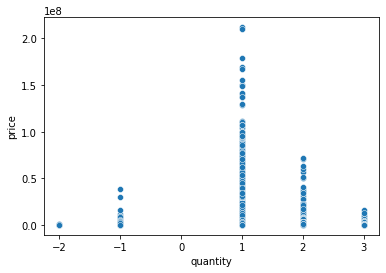

In [58]:
sns.scatterplot(data=df, x='quantity', y='price')

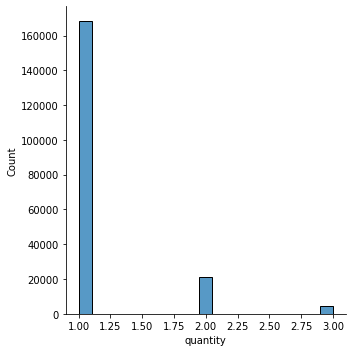

In [61]:
sns.displot(df['quantity'])

<AxesSubplot:xlabel='quantity', ylabel='price'>

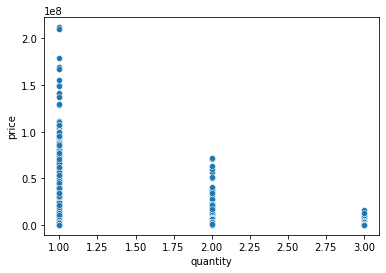

In [62]:
sns.scatterplot(data=df, x='quantity', y='price')

In [67]:
df.order_id.nunique()

73139

In [64]:
df.user_id.nunique()

55484

## Apparently, every product in this dataset is part of an order that may have more products in it, so, as i checked there is 73139 orders from 55484 users.

In [72]:
user_df = df.groupby('user_id').agg({ 
                            'order_id': 'count',
                            # 'variant_id': pd.Series.mode,
                            'product_id': 'count',
                            'quantity': 'sum',
                            'price': 'sum',
                            'city_name': pd.Series.mode,
                            'state_id': pd.Series.mode,
                            'state_name': pd.Series.mode
                            }).reset_index()

In [73]:
user_df['spentMean'] = user_df['price'] / user_df['quantity']
user_df.head(4)

,user_id,order_id,product_id,quantity,price,city_name,state_id,state_name,spentMean
0,++2u4Q40bTeC0ZZDau1MIQ==,3,3,4,932000,تهران,9,تهران,233000.0
1,++HwHhPvBHtXEIN36fDT5w==,6,6,8,1176000,الیگودرز,27,لرستان,147000.0
2,++IfjhhQ33j7i4NHdBUJkQ==,1,1,1,990000,تهران,9,تهران,990000.0
3,++KPSp+1ZC6KXlYAS8VcKg==,15,15,15,1690500,ملارد,9,تهران,112700.0


In [74]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head(4)

,order_id,user_id,variant_id,product_id,quantity,price,date,city_id,city_name,state_id,state_name,year,month,day,weekday,hour,weekdayName
0,262108413,SlcW7YT835JSzh22o7zRCA==,922274,406523,1,139000,2018-08-20 23:59:02,1698,تهران,9,تهران,2018,8,20,0,23,monday
1,262108413,SlcW7YT835JSzh22o7zRCA==,685868,435013,1,890000,2018-08-20 23:59:02,1698,تهران,9,تهران,2018,8,20,0,23,monday
2,262108353,NZidrSuPdqoG7RedrFakeA==,275077,163947,1,9890000,2018-08-20 23:58:39,1698,تهران,9,تهران,2018,8,20,0,23,monday
3,262108341,dLQImlfXMsgSub4OcfJpGg==,679393,158560,1,349000,2018-08-20 23:58:35,1855,مشهد,12,خراسان رضوی,2018,8,20,0,23,monday


In [75]:
def weekDayName(x):
    if x == 0: return 'monday'
    elif x == 1: return 'tuesday'
    elif x == 2: return 'wednesday'
    elif x == 3: return 'thursday'
    elif x == 4: return 'friday'
    elif x == 5: return 'saturday'
    elif x == 6: return 'sunday'
df['weekdayName'] = df['weekday'].apply(lambda x: weekDayName(x))
df.head(4)

,order_id,user_id,variant_id,product_id,quantity,price,date,city_id,city_name,state_id,state_name,year,month,day,weekday,hour,weekdayName
0,262108413,SlcW7YT835JSzh22o7zRCA==,922274,406523,1,139000,2018-08-20 23:59:02,1698,تهران,9,تهران,2018,8,20,0,23,monday
1,262108413,SlcW7YT835JSzh22o7zRCA==,685868,435013,1,890000,2018-08-20 23:59:02,1698,تهران,9,تهران,2018,8,20,0,23,monday
2,262108353,NZidrSuPdqoG7RedrFakeA==,275077,163947,1,9890000,2018-08-20 23:58:39,1698,تهران,9,تهران,2018,8,20,0,23,monday
3,262108341,dLQImlfXMsgSub4OcfJpGg==,679393,158560,1,349000,2018-08-20 23:58:35,1855,مشهد,12,خراسان رضوی,2018,8,20,0,23,monday


## since the priod of time is small, I have to use all I have, so to get a bit more information about customers, I tried to extract specific data about time and date of purchases.

In [78]:
weekday_df = pd.DataFrame(df.groupby('weekdayName')['order_id'].count()).reset_index()
weekday_df = weekday_df.rename(columns={'order_id': 'purchase_amount'})
weekday_df

,weekdayName,purchase_amount
0,friday,17388
1,monday,45118
2,saturday,29893
3,sunday,42623
4,thursday,16636
5,tuesday,21015
6,wednesday,21099


<AxesSubplot:xlabel='weekdayName', ylabel='purchase_amount'>

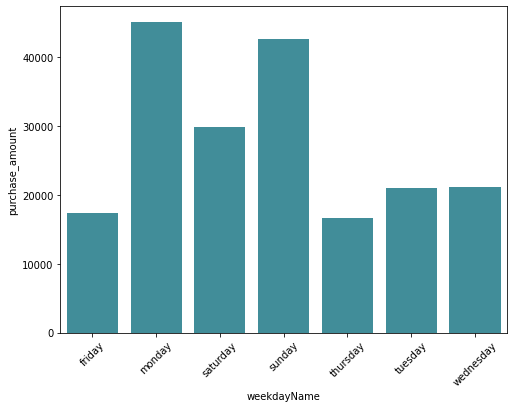

In [82]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
sns.barplot(data=weekday_df, x='weekdayName', y='purchase_amount', color='#3297a8')

In [83]:
hour_df = pd.DataFrame(df.groupby('hour')['order_id'].count()).reset_index()
hour_df = hour_df.rename(columns={'order_id': 'purchase_amount'})
hour_df.head(4)

,hour,purchase_amount
0,0,16206
1,1,9787
2,2,5165
3,3,2685


<AxesSubplot:xlabel='hour', ylabel='purchase_amount'>

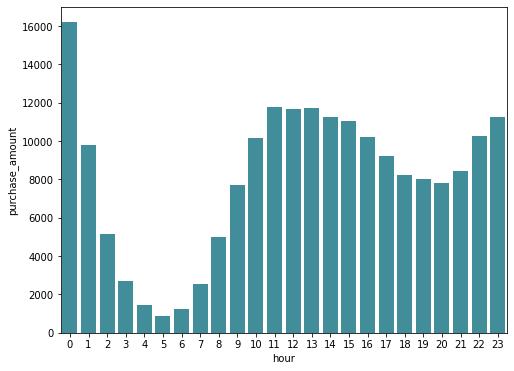

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(data=hour_df, x='hour', y='purchase_amount', color='#3297a8')

In [89]:
day_df = pd.DataFrame(df.groupby('day')['order_id'].count()).reset_index()
day_df = day_df.rename(columns={'order_id': 'purchase_amount'})
day_df

,day,purchase_amount
0,12,18820
1,13,23257
2,14,21015
3,15,21099
4,16,16636
5,17,17388
6,18,29893
7,19,23803
8,20,21861


<AxesSubplot:xlabel='day', ylabel='purchase_amount'>

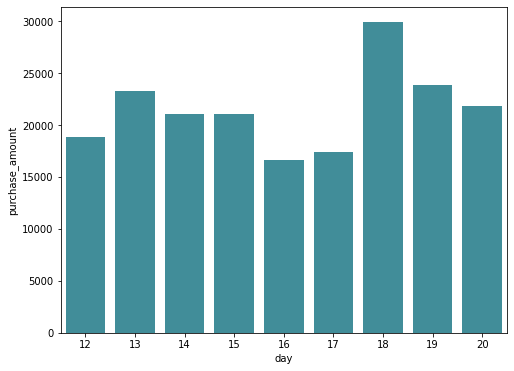

In [91]:
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x='day', y='purchase_amount', color='#3297a8')

In [101]:
state_df = pd.DataFrame(df.groupby('state_id')['price'].sum()).reset_index()
state_df = state_df.rename(columns={'price': 'purchace_amount'})
state_df.head(4)

,state_id,purchace_amount
0,2,3520030674
1,3,1896770600
2,4,1339792840
3,5,10404209149


<AxesSubplot:xlabel='state_id', ylabel='purchace_amount'>

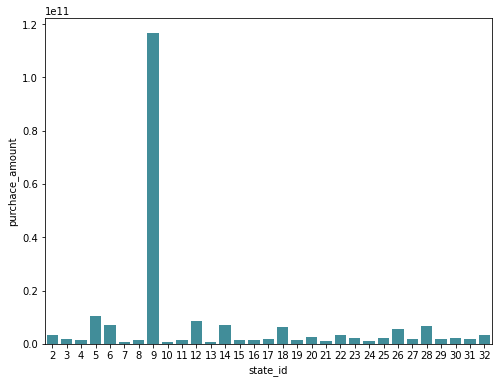

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# plt.xticks(rotation=45)
sns.barplot(data=state_df, x='state_id', y='purchace_amount', color='#3297a8')

In [97]:
order_state_df = pd.DataFrame(df.groupby('state_id')['order_id'].count()).reset_index()
order_state_df = order_state_df.rename(columns={'order_id': 'order_frequency'})
order_state_df.head(4)

,state_id,order_frequency
0,2,3472
1,3,2175
2,4,1133
3,5,9182


<AxesSubplot:xlabel='state_id', ylabel='order_frequency'>

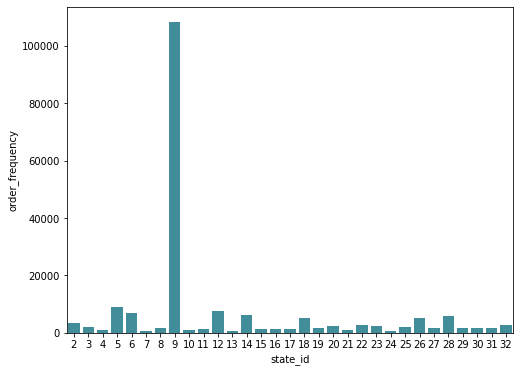

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# plt.xticks(rotation=45)
sns.barplot(data=order_state_df, x='state_id', y='order_frequency', color='#3297a8')

<AxesSubplot:title={'center':'Frequency of order by Day'}>

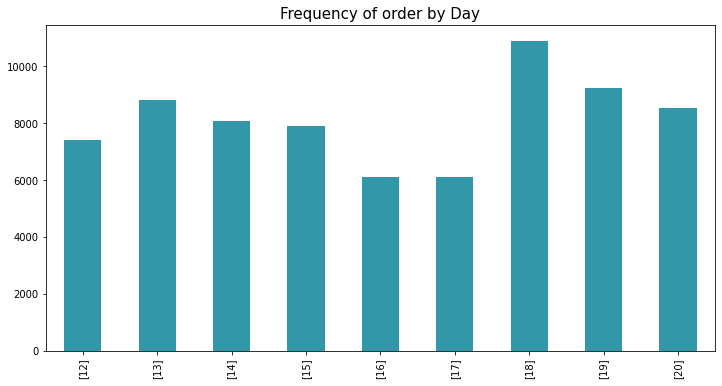

In [96]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
order_per_day_df = df.groupby(['order_id'])['day'].unique()
order_per_day_df.value_counts().sort_index().plot.bar(color='#3297a8')

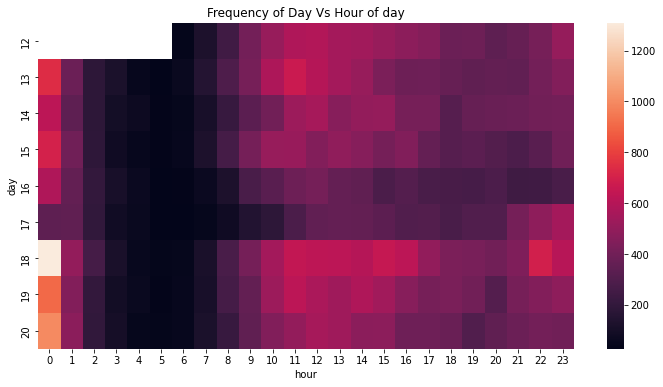

In [103]:
day_hour_df  = df.groupby(["day", "hour"])["order_id"].unique().reset_index()
day_hour_df["order_id"] = day_hour_df["order_id"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["order_id"].aggregate("count").reset_index()
day_hour_df = day_hour_df.pivot('day', 'hour', 'order_id')

plt.figure(figsize=(12,6))
sns.heatmap(day_hour_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

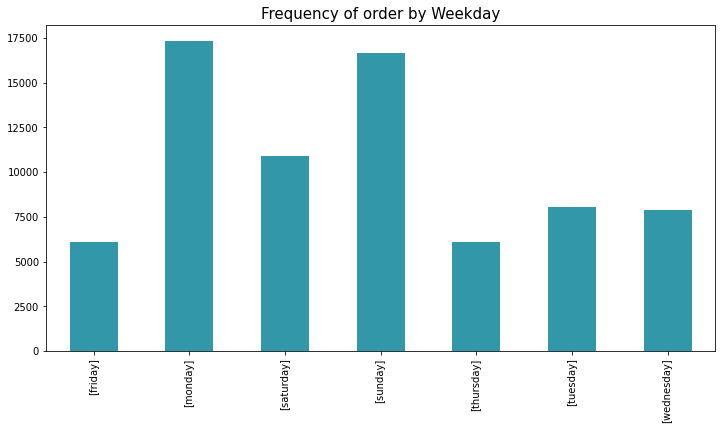

In [104]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
order_weekday = df.groupby(['order_id'])['weekdayName'].unique()
order_weekday.value_counts().sort_index().plot.bar(color='#3297a8')

<AxesSubplot:title={'center':'Frequency of order by hour of day'}>

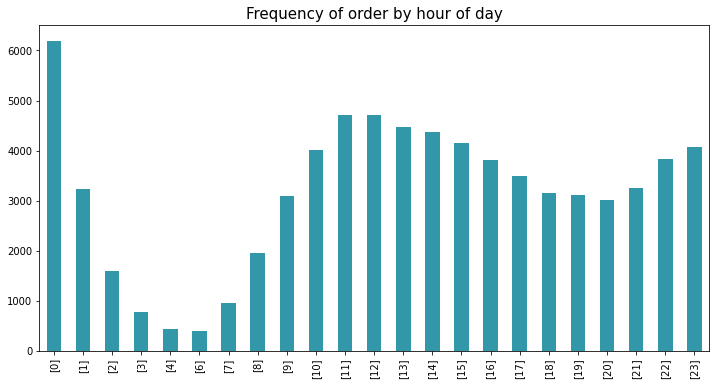

In [105]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
order_hour_df = df.groupby(['order_id'])['hour'].unique()
(order_hour_df.value_counts()).iloc[0:-1].sort_index().plot.bar(color='#3297a8')

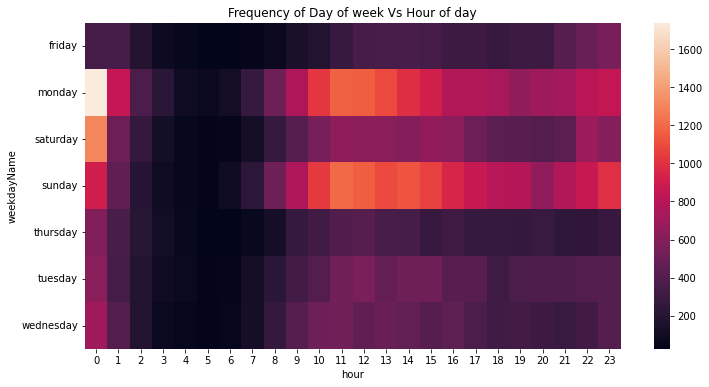

In [106]:
weekday_hour_df  = df.groupby(["weekdayName", "hour"])["order_id"].unique().reset_index()
weekday_hour_df["order_id"] = weekday_hour_df["order_id"].apply(len)

#weekday_hour_df = df.groupby(["Weekday", "hour"])["order_id"].aggregate("count").reset_index()
weekday_hour_df = weekday_hour_df.pivot('weekdayName', 'hour', 'order_id')

plt.figure(figsize=(12,6))
sns.heatmap(weekday_hour_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [107]:
# --Group data by customerID--
# Create snapshot date
snapshot_date = df['date'].max() + timedelta(days=1)
print(snapshot_date)
# Grouping by CustomerID
df_proc = df.groupby(['user_id']).agg({
        'date': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'price': 'sum'})
# Rename the columns 
df_proc.rename(columns={'date': 'Recency',
                        'order_id': 'Frequency',
                        'price': 'MonetaryValue'}, inplace=True)
df_proc

2018-08-21 23:59:02


,Recency,Frequency,MonetaryValue
user_id,,,
++2u4Q40bTeC0ZZDau1MIQ==,1,3,932000
++HwHhPvBHtXEIN36fDT5w==,2,6,1176000
++IfjhhQ33j7i4NHdBUJkQ==,8,1,990000
++KPSp+1ZC6KXlYAS8VcKg==,7,15,1690500
++XCbp2ChGJyYhM/fYWudg==,9,1,1150000
...,...,...,...
zzWZd4QWwB0L4Un+lgk/Wg==,1,8,4803000
zzZseLwyCpzXFtpz4on05Q==,7,3,1560000
zzaH+nGpEGQI2z/KZyT1GA==,3,1,3630000


C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

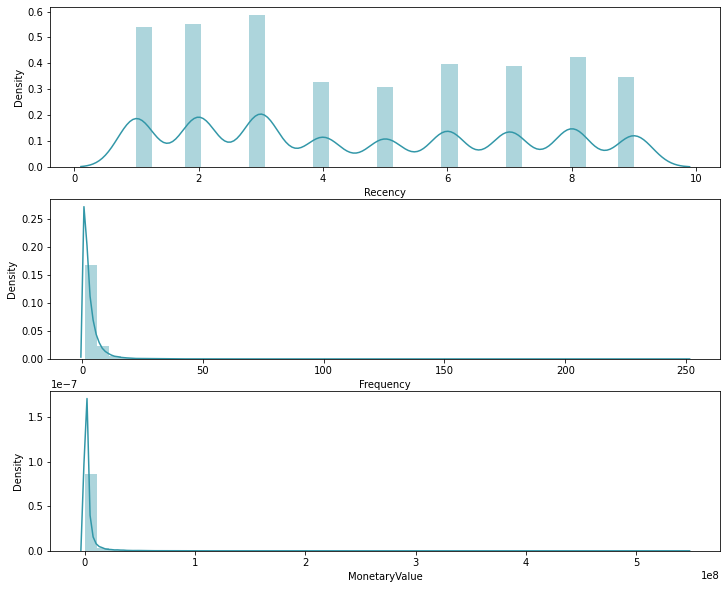

In [109]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_proc['Recency'], color='#3297a8')
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df_proc['Frequency'], color='#3297a8')
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df_proc['MonetaryValue'], color='#3297a8')
# Show the plot
plt.show()

In [110]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
# r_groups = pd.qcut(df_proc['Recency'], q=4, labels=r_labels)
r_groups = pd.cut(df_proc['Recency'].rank(pct=True), 
                             bins=4, labels=f_labels)
# Assign these labels to 4 equal percentile groups 
# f_groups = pd.qcut(df_proc['Frequency'], q=4, labels=f_labels, duplicates='drop')

f_groups = pd.cut(df_proc['Frequency'].rank(pct=True), 
                             bins=4, labels=f_labels)
# Create new columns R and F 
df_proc = df_proc.assign(R = r_groups.values, F = f_groups.values)
df_proc.head()

,Recency,Frequency,MonetaryValue,R,F
user_id,,,,,
++2u4Q40bTeC0ZZDau1MIQ==,1,3,932000,1,3
++HwHhPvBHtXEIN36fDT5w==,2,6,1176000,1,4
++IfjhhQ33j7i4NHdBUJkQ==,8,1,990000,4,1
++KPSp+1ZC6KXlYAS8VcKg==,7,15,1690500,4,4
++XCbp2ChGJyYhM/fYWudg==,9,1,1150000,4,1


In [111]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df_proc['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
df_proc = df_proc.assign(M = m_groups.values)

In [112]:
df_proc.head(4)

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
++2u4Q40bTeC0ZZDau1MIQ==,1,3,932000,1,3,2
++HwHhPvBHtXEIN36fDT5w==,2,6,1176000,1,4,2
++IfjhhQ33j7i4NHdBUJkQ==,8,1,990000,4,1,2
++KPSp+1ZC6KXlYAS8VcKg==,7,15,1690500,4,4,3


In [113]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
df_proc['RFM_Segment_Concat'] = df_proc.apply(join_rfm, axis=1)
rfm = df_proc
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
user_id,,,,,,,
++2u4Q40bTeC0ZZDau1MIQ==,1,3,932000,1,3,2,132
++HwHhPvBHtXEIN36fDT5w==,2,6,1176000,1,4,2,142
++IfjhhQ33j7i4NHdBUJkQ==,8,1,990000,4,1,2,412
++KPSp+1ZC6KXlYAS8VcKg==,7,15,1690500,4,4,3,443
++XCbp2ChGJyYhM/fYWudg==,9,1,1150000,4,1,2,412


In [114]:
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

64


In [115]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

user_id
++2u4Q40bTeC0ZZDau1MIQ==     6.0
++HwHhPvBHtXEIN36fDT5w==     7.0
++IfjhhQ33j7i4NHdBUJkQ==     7.0
++KPSp+1ZC6KXlYAS8VcKg==    11.0
++XCbp2ChGJyYhM/fYWudg==     7.0
Name: RFM_Score, dtype: float64


In [116]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
user_id,,,,,,,,,
++2u4Q40bTeC0ZZDau1MIQ==,1,3,932000,1,3,2,132,6.0,Potential
++HwHhPvBHtXEIN36fDT5w==,2,6,1176000,1,4,2,142,7.0,Loyal
++IfjhhQ33j7i4NHdBUJkQ==,8,1,990000,4,1,2,412,7.0,Loyal
++KPSp+1ZC6KXlYAS8VcKg==,7,15,1690500,4,4,3,443,11.0,Can't Loose Them
++XCbp2ChGJyYhM/fYWudg==,9,1,1150000,4,1,2,412,7.0,Loyal


In [117]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue       
                      mean      mean          mean  count
RFM_Level                                                
Can't Loose Them       5.7       6.5     7133701.7  16860
Champions              5.0       3.4     3754678.2   9480
Loyal                  4.6       2.5     2957500.3   8810
Needs Attention        2.5       1.2      650396.5   3805
Potential              4.6       1.7     2090729.3   9025
Promising              3.2       1.5     1013283.8   5525
Require Activation     1.6       1.0      392488.1   1979


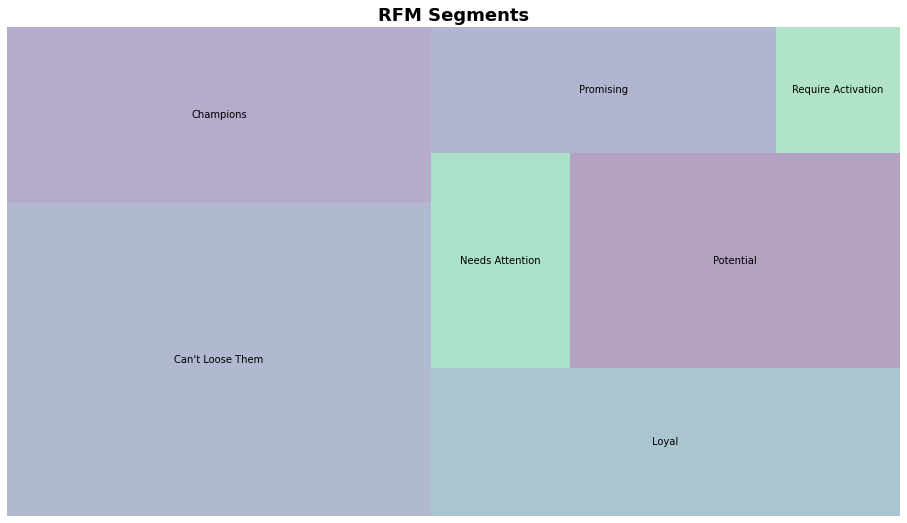

In [119]:
# rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.4 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [120]:
user_date_df = df.groupby(['user_id', 'date']).agg({ 
                            'order_id': 'count',
                            # 'variant_id': pd.Series.mode,
                            'quantity': 'sum',
                            'price': 'sum',
                            'city_name': pd.Series.mode,
                            'state_id': pd.Series.mode,
                            'state_name': pd.Series.mode
                            }).reset_index()

In [121]:
user_date_df.sort_values('price', ascending=False)

,user_id,date,order_id,quantity,price,city_name,state_id,state_name
16914,CmQFSYW7Sso7eoRbzqzV9g==,2018-08-12 06:59:38,10,10,481354000,تهران,9,تهران
8729,5ilvtuFs+fc9pIzTDMH5BQ==,2018-08-18 14:40:52,4,6,325600000,تهران,9,تهران
55983,l+Y2WItmthXPoClUmsM+0w==,2018-08-15 19:26:04,9,10,214687000,تهران,9,تهران
71761,yqssI7lYQ/nXmLiqaUG6bw==,2018-08-19 13:34:05,1,1,212000000,زنجان,15,زنجان
27078,Lhf/Oa83ocN6mUOl5Uot8Q==,2018-08-15 23:07:26,4,4,199930000,تهران,9,تهران
...,...,...,...,...,...,...,...,...
48830,etTUBepKVxQ9DEqOcfzr6g==,2018-08-19 16:46:43,1,1,10900,تهران,9,تهران
7959,5571gq5GjbX7UvL2pFCamQ==,2018-08-16 07:58:03,1,1,9000,تهران,9,تهران
56456,lL+6j7QIkD5vbHrsBJP6Ag==,2018-08-20 17:09:33,1,2,8500,تهران,9,تهران
20906,GP1Fj5oMnG0Zutpg9mlaFA==,2018-08-14 00:03:56,1,1,6000,اهواز,14,خوزستان
